In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load SENSEX (BSE) datasets historical data (01/04/2023 - 31/03/2025)
reliance_bse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\my certificates\\NTCC\\data set\\BSE\\Reliance Industries Ltd (BSE).csv")
hdfcbank_bse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\my certificates\\NTCC\\data set\\BSE\\HDFC Bank Ltd (BSE).csv")
infy_bse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\my certificates\\NTCC\\data set\\BSE\\Infosys Ltd (BSE).csv")
tcs_bse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\my certificates\\NTCC\\data set\\BSE\\Tata Consultancy Services Ltd (BSE).csv")

In [3]:
# Load SENSEX (BSE) datasets historical data (01/04/2023 - 31/03/2025)
reliance_nse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\my certificates\\NTCC\\data set\\NSE\\Reliance Industries Ltd (NSE).csv")
hdfcbank_nse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\my certificates\\NTCC\\data set\\NSE\\HDFC Bank Ltd (NSE).csv")
infy_nse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\my certificates\\NTCC\\data set\\NSE\\Infosys Ltd (NSE).csv")
tcs_nse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\my certificates\\NTCC\\data set\\NSE\\Tata Consultancy Services Ltd (NSE).csv")

In [4]:
reliance_bse.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,28-March-2025,1279.30,1295.70,1269.05,1275.00,1280.164162,987799,24092,1.264545e+09,580124,58.73,26.65,-4.30
1,27-March-2025,1275.05,1285.15,1272.05,1278.40,1279.554705,278220,6731,3.559977e+08,169525,60.93,13.10,3.35
2,26-March-2025,1290.25,1293.95,1269.00,1272.55,1281.415763,658347,9779,8.436162e+08,507412,77.07,24.95,-17.70
3,25-March-2025,1307.00,1307.00,1283.00,1285.40,1289.392360,865836,23947,1.116402e+09,504707,58.29,24.00,-21.60
4,24-March-2025,1286.40,1305.30,1281.00,1301.35,1298.036675,861533,26632,1.118301e+09,514147,59.68,24.30,14.95


In [5]:
reliance_nse.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-25,EQ,"1,280.00","1,295.75","1,269.00","1,278.20","1,274.00","1,275.10","1,278.15","3,217.60","1,156.00","1,81,47,129","23,19,47,74,030.90","2,65,113"
1,27-Mar-25,EQ,"1,278.15","1,285.00","1,271.30","1,273.05","1,280.00","1,278.20","1,278.90","3,217.60","1,156.00","1,50,28,056","19,21,93,99,902.90","2,24,828"
2,26-Mar-25,EQ,"1,291.00","1,293.80","1,268.75","1,285.45","1,270.90","1,273.05","1,279.04","3,217.60","1,156.00","1,20,74,747","15,44,40,62,345.35","2,92,138"
3,25-Mar-25,EQ,"1,307.70","1,307.70","1,282.60","1,302.10","1,285.25","1,285.45","1,290.63","3,217.60","1,156.00","1,37,13,899","17,69,95,68,389.85","2,71,251"
4,24-Mar-25,EQ,"1,291.00","1,306.00","1,284.25","1,276.35","1,302.65","1,302.10","1,297.38","3,217.60","1,156.00","2,02,99,319","26,33,59,01,171.15","3,47,056"


In [6]:
def filter_stock_columns(df, ticker, exchange):
    # Standardize column names
    df.columns = df.columns.str.strip().str.upper()
    
    # Rename common column name variations
    rename_map = {
        'OPEN PRICE': 'OPEN',
        'HIGH PRICE': 'HIGH',
        'LOW PRICE': 'LOW',
        'CLOSE PRICE': 'CLOSE',
        'LAST TRADED PRICE': 'CLOSE',
        'TIMESTAMP': 'DATE',
    }
    df.rename(columns=rename_map, inplace=True)
    
    # Parse DATE
    if 'DATE' in df.columns:
        df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    else:
        print(f"[WARNING] No DATE column found for {ticker} ({exchange})")
    
    # Columns to retain
    required_columns = ['DATE','OPEN', 'HIGH', 'LOW', 'CLOSE']
    present_columns = [col for col in required_columns if col in df.columns]

    # Remove commas and convert price columns to float
    for col in ['OPEN', 'HIGH', 'LOW', 'CLOSE']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    
    # Filter and drop rows with missing values
    filtered_df = df[present_columns].dropna()
    
    # Add metadata
    filtered_df['TICKER'] = ticker
    filtered_df['EXCHANGE'] = exchange
    
    return filtered_df


# Apply to all your datasets
df_reliance_bse_filtered = filter_stock_columns(reliance_bse, 'RELIANCE', 'BSE')
df_hdfcbank_bse_filtered = filter_stock_columns(hdfcbank_bse, 'HDFCBANK', 'BSE')
df_infy_bse_filtered = filter_stock_columns(infy_bse, 'INFOSYS', 'BSE')
df_tcs_bse_filtered = filter_stock_columns(tcs_bse, 'TCS', 'BSE')

df_reliance_nse_filtered = filter_stock_columns(reliance_nse, 'RELIANCE', 'NSE')
df_hdfcbank_nse_filtered = filter_stock_columns(hdfcbank_nse, 'HDFCBANK', 'NSE')
df_infy_nse_filtered = filter_stock_columns(infy_nse, 'INFOSYS', 'NSE')
df_tcs_nse_filtered = filter_stock_columns(tcs_nse, 'TCS', 'NSE')


C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_22152\1024638900.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_22152\1024638900.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_22152\1024638900.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
C:\Users\AMAN KUMAR  SINGH\AppD

In [7]:
df_reliance_bse_filtered

,DATE,OPEN,HIGH,LOW,CLOSE,TICKER,EXCHANGE
0,2025-03-28,1279.30,1295.70,1269.05,1275.00,RELIANCE,BSE
1,2025-03-27,1275.05,1285.15,1272.05,1278.40,RELIANCE,BSE
2,2025-03-26,1290.25,1293.95,1269.00,1272.55,RELIANCE,BSE
3,2025-03-25,1307.00,1307.00,1283.00,1285.40,RELIANCE,BSE
4,2025-03-24,1286.40,1305.30,1281.00,1301.35,RELIANCE,BSE
...,...,...,...,...,...,...,...
490,2023-04-11,2330.00,2341.00,2324.00,2336.30,RELIANCE,BSE
491,2023-04-10,2346.00,2350.40,2321.90,2324.60,RELIANCE,BSE
492,2023-04-06,2320.00,2354.50,2318.05,2341.00,RELIANCE,BSE
493,2023-04-05,2341.75,2346.60,2308.50,2325.50,RELIANCE,BSE


In [8]:
df_reliance_nse_filtered

,DATE,OPEN,HIGH,LOW,CLOSE,TICKER,EXCHANGE
0,2025-03-28,1280.00,1295.75,1269.00,1275.10,RELIANCE,NSE
1,2025-03-27,1278.15,1285.00,1271.30,1278.20,RELIANCE,NSE
2,2025-03-26,1291.00,1293.80,1268.75,1273.05,RELIANCE,NSE
3,2025-03-25,1307.70,1307.70,1282.60,1285.45,RELIANCE,NSE
4,2025-03-24,1291.00,1306.00,1284.25,1302.10,RELIANCE,NSE
...,...,...,...,...,...,...,...
490,2023-04-11,2334.00,2341.00,2324.05,2336.35,RELIANCE,NSE
491,2023-04-10,2350.00,2350.40,2321.55,2324.85,RELIANCE,NSE
492,2023-04-06,2318.15,2354.00,2318.15,2341.45,RELIANCE,NSE
493,2023-04-05,2348.00,2348.00,2308.55,2325.85,RELIANCE,NSE


In [9]:
# Combine all into one dataset
combined_df = pd.concat([
    df_reliance_bse_filtered, df_hdfcbank_bse_filtered, df_infy_bse_filtered, df_tcs_bse_filtered,
    df_reliance_nse_filtered, df_hdfcbank_nse_filtered, df_infy_nse_filtered, df_tcs_nse_filtered
], ignore_index=True)

# Preview combined data
print(combined_df.head())


        DATE     OPEN     HIGH      LOW    CLOSE    TICKER EXCHANGE
0 2025-03-28  1279.30  1295.70  1269.05  1275.00  RELIANCE      BSE
1 2025-03-27  1275.05  1285.15  1272.05  1278.40  RELIANCE      BSE
2 2025-03-26  1290.25  1293.95  1269.00  1272.55  RELIANCE      BSE
3 2025-03-25  1307.00  1307.00  1283.00  1285.40  RELIANCE      BSE
4 2025-03-24  1286.40  1305.30  1281.00  1301.35  RELIANCE      BSE


In [10]:
combined_reliance = pd.concat([df_reliance_bse_filtered, df_reliance_nse_filtered]) 
combined_hdfcbank = pd.concat([df_hdfcbank_bse_filtered, df_hdfcbank_nse_filtered]) 
combined_infy = pd.concat([df_infy_bse_filtered, df_infy_nse_filtered]) 
combined_tcs = pd.concat([df_tcs_bse_filtered, df_tcs_nse_filtered]) 

In [11]:
combined_BSE = pd.concat([df_reliance_bse_filtered, df_hdfcbank_bse_filtered, df_infy_bse_filtered, df_tcs_bse_filtered])
combined_NSE = pd.concat([df_reliance_nse_filtered, df_hdfcbank_nse_filtered, df_infy_nse_filtered, df_tcs_nse_filtered]) 

In [37]:
combined_df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKER,EXCHANGE
0,2025-03-28,1279.30,1295.70,1269.05,1275.00,RELIANCE,BSE
1,2025-03-27,1275.05,1285.15,1272.05,1278.40,RELIANCE,BSE
2,2025-03-26,1290.25,1293.95,1269.00,1272.55,RELIANCE,BSE
3,2025-03-25,1307.00,1307.00,1283.00,1285.40,RELIANCE,BSE
4,2025-03-24,1286.40,1305.30,1281.00,1301.35,RELIANCE,BSE
...,...,...,...,...,...,...,...
3955,2023-04-11,3264.00,3272.95,3192.15,3213.80,TCS,NSE
3956,2023-04-10,3220.00,3272.00,3215.00,3263.40,TCS,NSE
3957,2023-04-06,3225.00,3257.35,3215.00,3220.70,TCS,NSE
3958,2023-04-05,3185.50,3264.35,3185.50,3239.80,TCS,NSE


In [13]:
combined_reliance

,DATE,OPEN,HIGH,LOW,CLOSE,TICKER,EXCHANGE
0,2025-03-28,1279.30,1295.70,1269.05,1275.00,RELIANCE,BSE
1,2025-03-27,1275.05,1285.15,1272.05,1278.40,RELIANCE,BSE
2,2025-03-26,1290.25,1293.95,1269.00,1272.55,RELIANCE,BSE
3,2025-03-25,1307.00,1307.00,1283.00,1285.40,RELIANCE,BSE
4,2025-03-24,1286.40,1305.30,1281.00,1301.35,RELIANCE,BSE
...,...,...,...,...,...,...,...
490,2023-04-11,2334.00,2341.00,2324.05,2336.35,RELIANCE,NSE
491,2023-04-10,2350.00,2350.40,2321.55,2324.85,RELIANCE,NSE
492,2023-04-06,2318.15,2354.00,2318.15,2341.45,RELIANCE,NSE
493,2023-04-05,2348.00,2348.00,2308.55,2325.85,RELIANCE,NSE


### 1. Line Plot: Company-wise Closing Prices for BSE and NSE
* The line plots below show the closing price trends of the selected companies listed on the BSE and NSE. Each company exhibits consistent pricing behavior across both exchanges, reinforcing the decision to merge data for combined modeling.

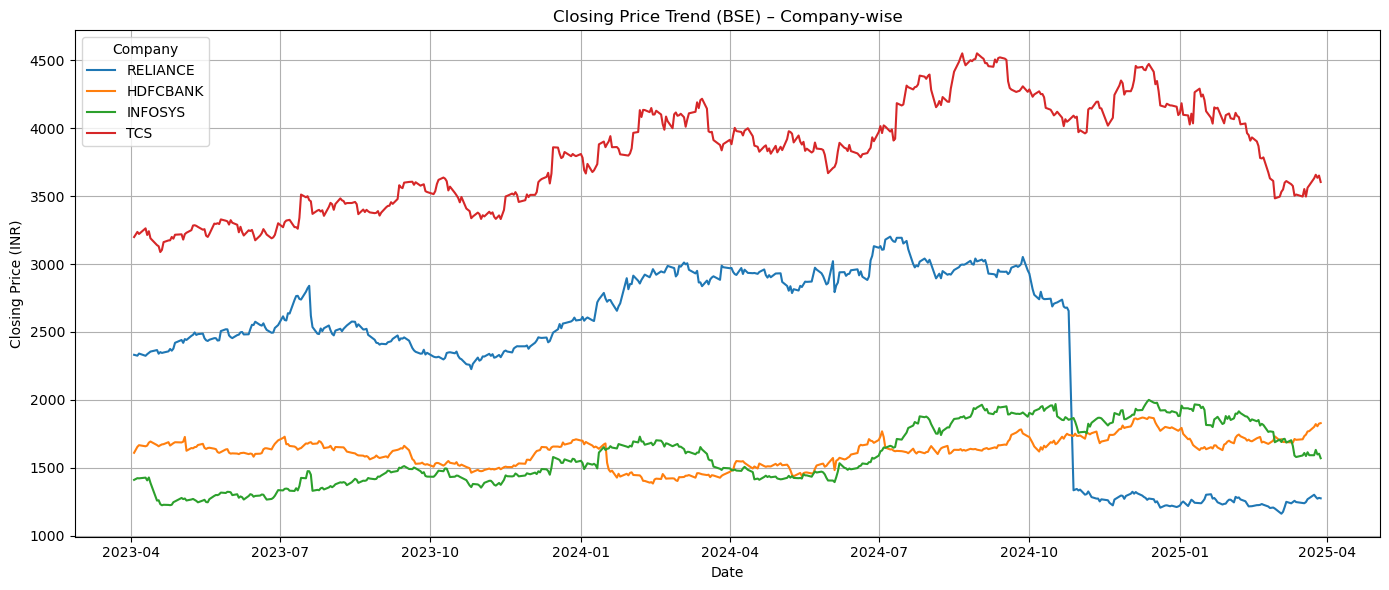

In [14]:
# Line Plot: Company-wise Closing Prices for BSE 
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_BSE, x='DATE', y='CLOSE', hue='TICKER')
plt.title('Closing Price Trend (BSE) – Company-wise')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()


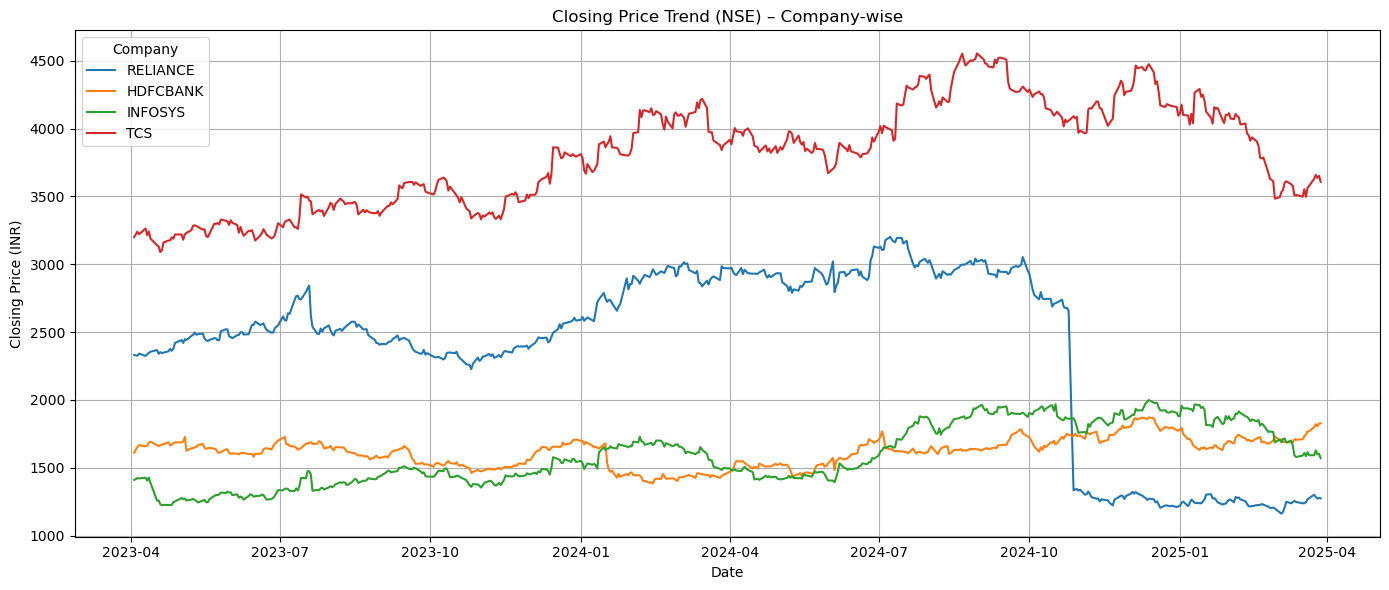

In [15]:
# Line Plot: Company-wise Closing Prices for BSE
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_NSE, x='DATE', y='CLOSE', hue='TICKER')
plt.title('Closing Price Trend (NSE) – Company-wise')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. Moving Average (Trend Smoothing)
* Add a 30-day moving average for smoother trend analysis
* Helps detect long-term vs short-term price trends.

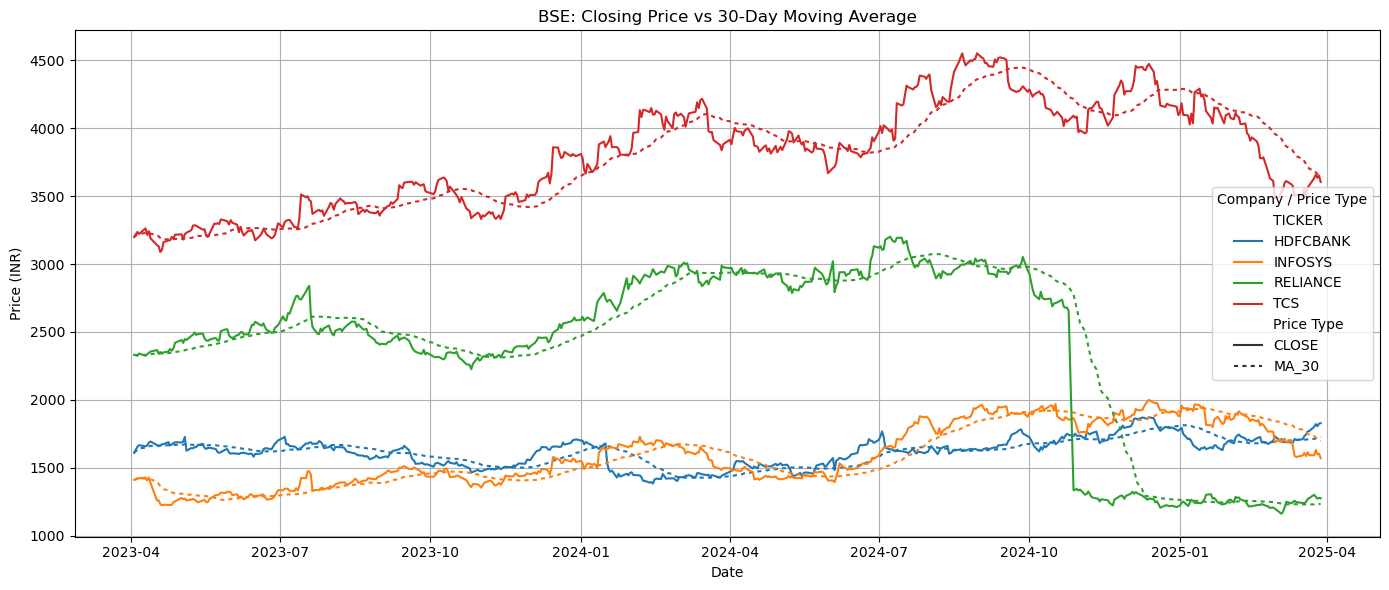

In [16]:
# Make sure MA_30 is calculated
combined_BSE = combined_BSE.sort_values(by=['TICKER', 'DATE'])
combined_BSE['MA_30'] = combined_BSE.groupby('TICKER')['CLOSE'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Reshape for plotting (melt the dataframe)
bse_long = pd.melt(
    combined_BSE,
    id_vars=['DATE', 'TICKER'],
    value_vars=['CLOSE', 'MA_30'],
    var_name='Price Type',
    value_name='Price'
)

# Plot with hue=TICKER and linestyle for MA/CLOSE
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=bse_long,
    x='DATE',
    y='Price',
    hue='TICKER',
    style='Price Type',  # Different linestyle for MA
    dashes={'CLOSE': '', 'MA_30': (2, 2)}  # solid for CLOSE, dashed for MA_30
)
plt.title('BSE: Closing Price vs 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.legend(title='Company / Price Type')
plt.tight_layout()
plt.show()


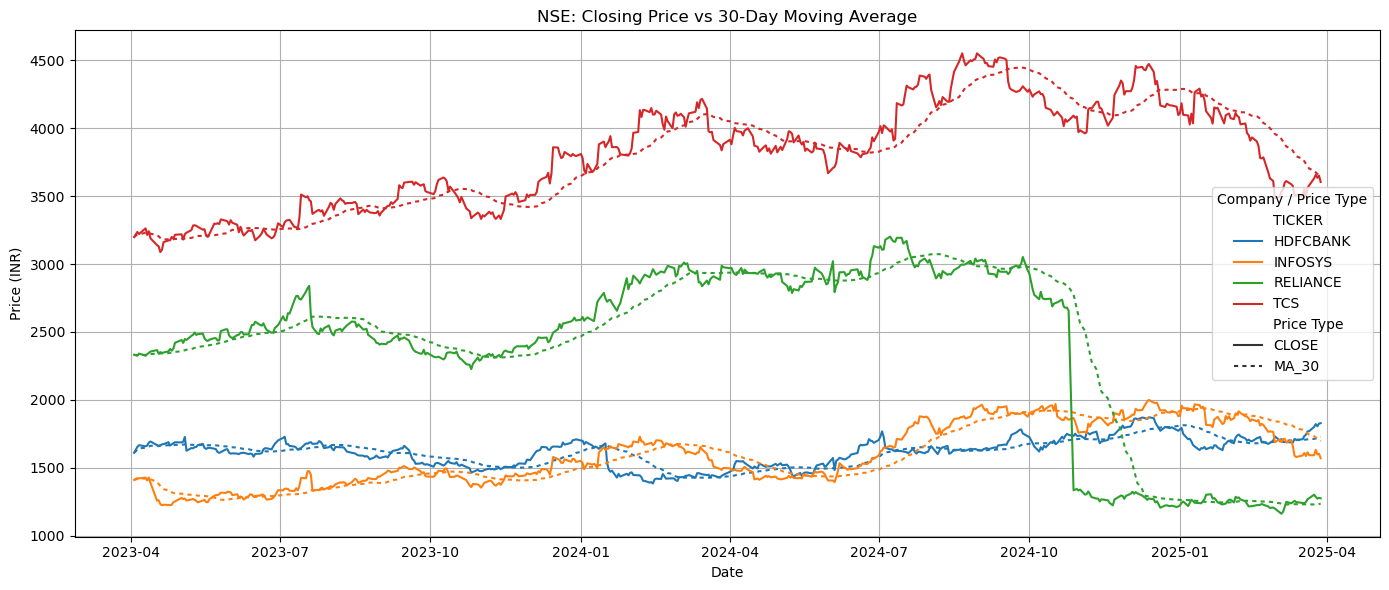

In [17]:
# Make sure MA_30 is calculated
combined_NSE = combined_NSE.sort_values(by=['TICKER', 'DATE'])
combined_NSE['MA_30'] = combined_NSE.groupby('TICKER')['CLOSE'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Reshape for plotting (melt the dataframe)
nse_long = pd.melt(
    combined_NSE,
    id_vars=['DATE', 'TICKER'],
    value_vars=['CLOSE', 'MA_30'],
    var_name='Price Type',
    value_name='Price'
)

# Plot with hue=TICKER and linestyle for MA/CLOSE
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=bse_long,
    x='DATE',
    y='Price',
    hue='TICKER',
    style='Price Type',  # Different linestyle for MA
    dashes={'CLOSE': '', 'MA_30': (2, 2)}  # solid for CLOSE, dashed for MA_30
)
plt.title('NSE: Closing Price vs 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.legend(title='Company / Price Type')
plt.tight_layout()
plt.show()


### 3. Daily Returns (Volatility Insight)
* Shows how much a stock fluctuates daily.

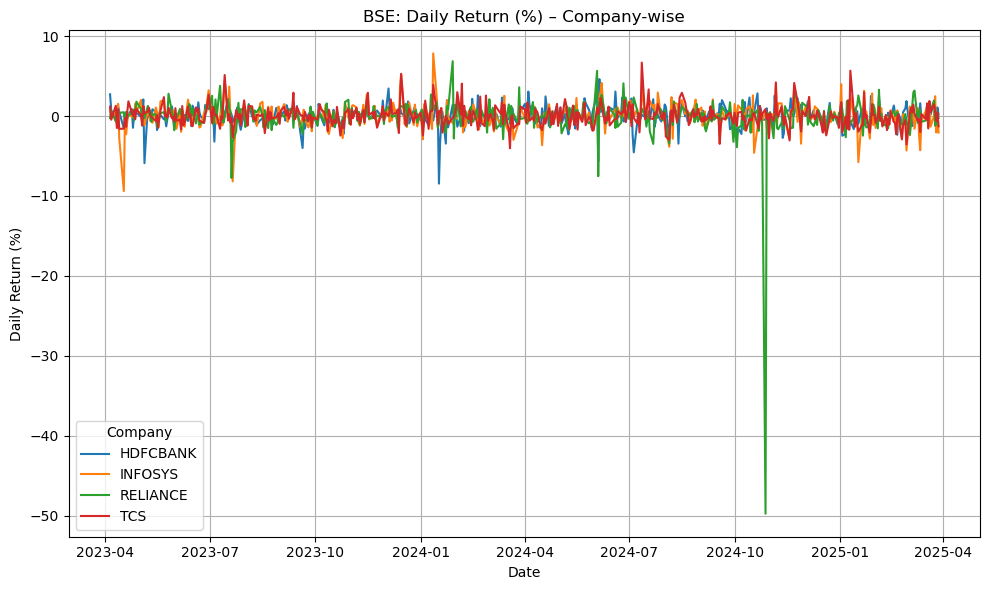

In [18]:
# Ensure unique index
combined_BSE = combined_BSE.reset_index(drop=True)

# Calculate daily return as % change in closing prices
combined_BSE['DAILY_RETURN'] = combined_BSE.groupby('TICKER')['CLOSE'].pct_change() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_BSE, x='DATE', y='DAILY_RETURN', hue='TICKER')
plt.title('BSE: Daily Return (%) – Company-wise')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.legend(title='Company')
plt.tight_layout()
plt.show()


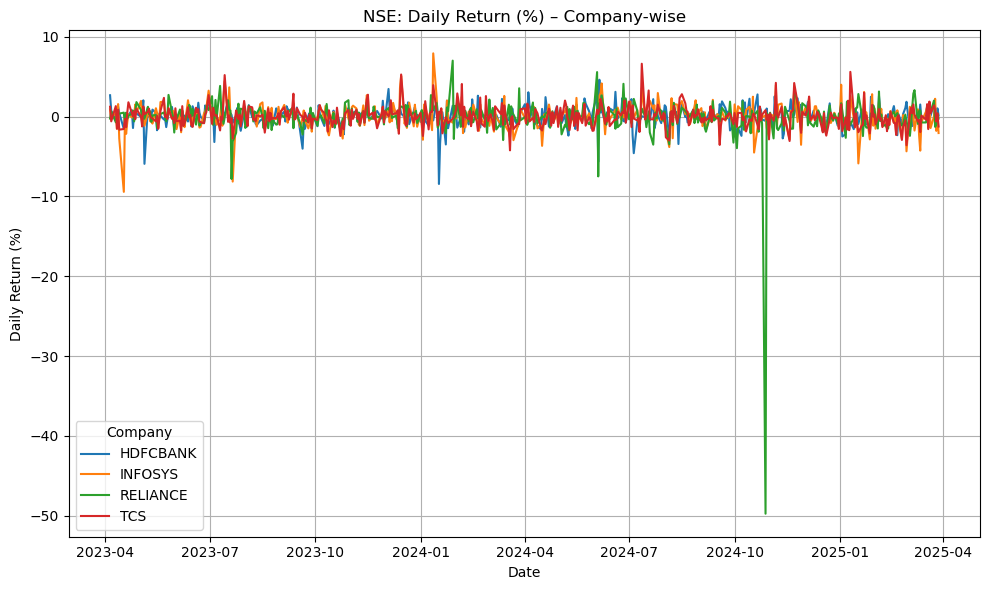

In [19]:
# Ensure unique index
combined_NSE = combined_NSE.reset_index(drop=True)

# Calculate daily return as % change in closing prices
combined_NSE['DAILY_RETURN'] = combined_NSE.groupby('TICKER')['CLOSE'].pct_change() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_NSE, x='DATE', y='DAILY_RETURN', hue='TICKER')
plt.title('NSE: Daily Return (%) – Company-wise')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.legend(title='Company')
plt.tight_layout()
plt.show()


### 4. Volatility (Standard Deviation of Returns)
* Quantifies risk. High = more volatile.

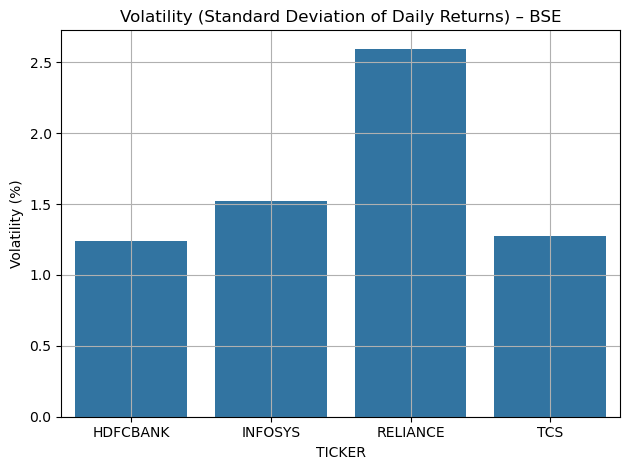

In [20]:
volatility_bse = combined_BSE.groupby('TICKER')['DAILY_RETURN'].std().reset_index().rename(columns={'DAILY_RETURN': 'VOLATILITY'})
sns.barplot(data=volatility_bse, x='TICKER', y='VOLATILITY')
plt.title('Volatility (Standard Deviation of Daily Returns) – BSE')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


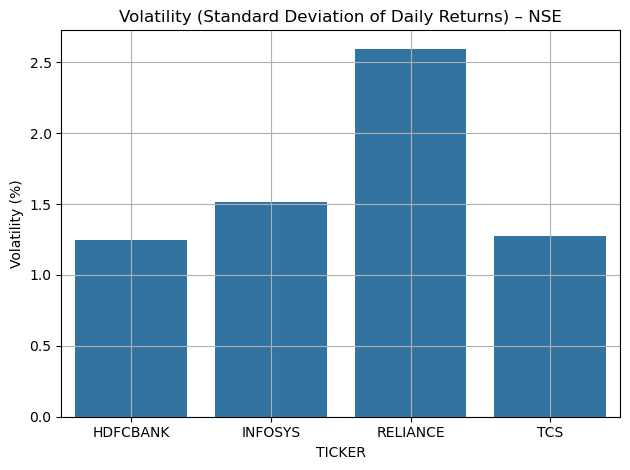

In [21]:
volatility_nse = combined_NSE.groupby('TICKER')['DAILY_RETURN'].std().reset_index().rename(columns={'DAILY_RETURN': 'VOLATILITY'})
sns.barplot(data=volatility_nse, x='TICKER', y='VOLATILITY')
plt.title('Volatility (Standard Deviation of Daily Returns) – NSE')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 5. Correlation Between Companies
* Reveals if companies move together. 

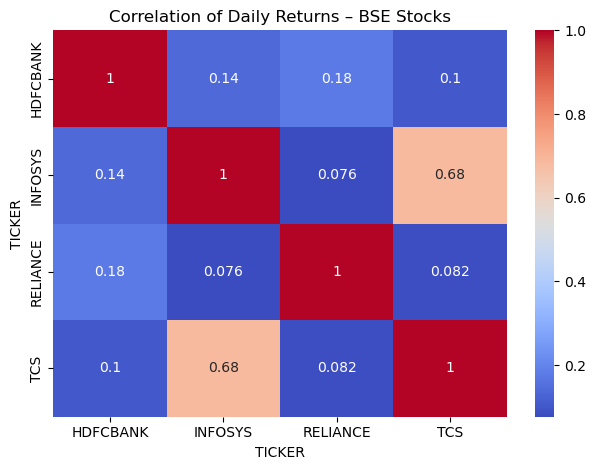

In [22]:
pivot_data = combined_BSE.pivot(index='DATE', columns='TICKER', values='CLOSE')
correlation_matrix = pivot_data.pct_change().corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns – BSE Stocks')
plt.tight_layout()
plt.show()


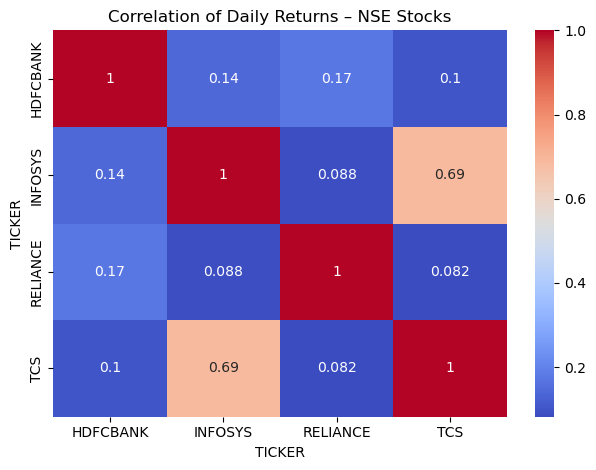

In [23]:
pivot_data = combined_NSE.pivot(index='DATE', columns='TICKER', values='CLOSE')
correlation_matrix = pivot_data.pct_change().corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns – NSE Stocks')
plt.tight_layout()
plt.show()


### Box Plot of Returns (Distribution)
* Visualizes spread and outliers of daily returns.

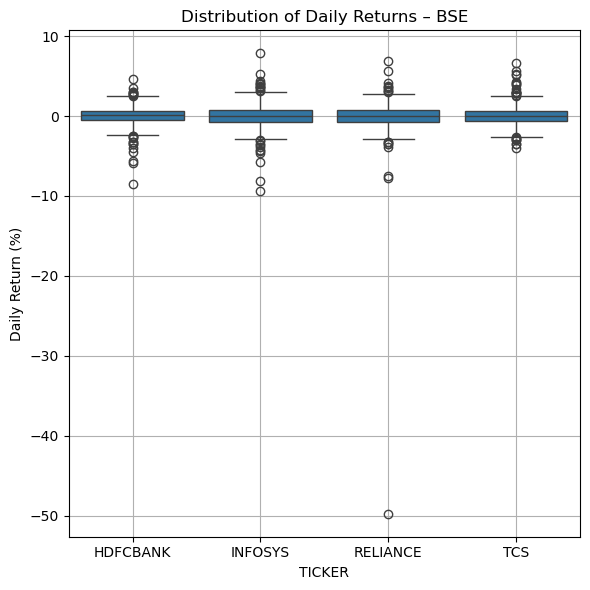

In [24]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=combined_BSE, x='TICKER', y='DAILY_RETURN')
plt.title('Distribution of Daily Returns – BSE')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


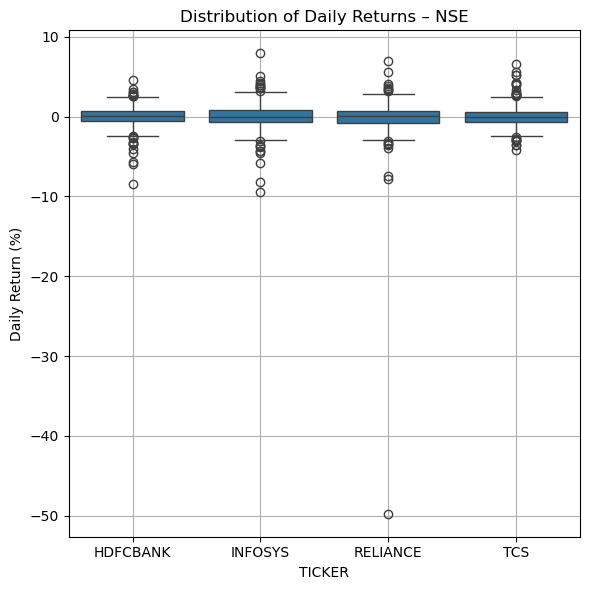

In [25]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=combined_NSE, x='TICKER', y='DAILY_RETURN')
plt.title('Distribution of Daily Returns – NSE')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


###  Separate Histograms for Each Company

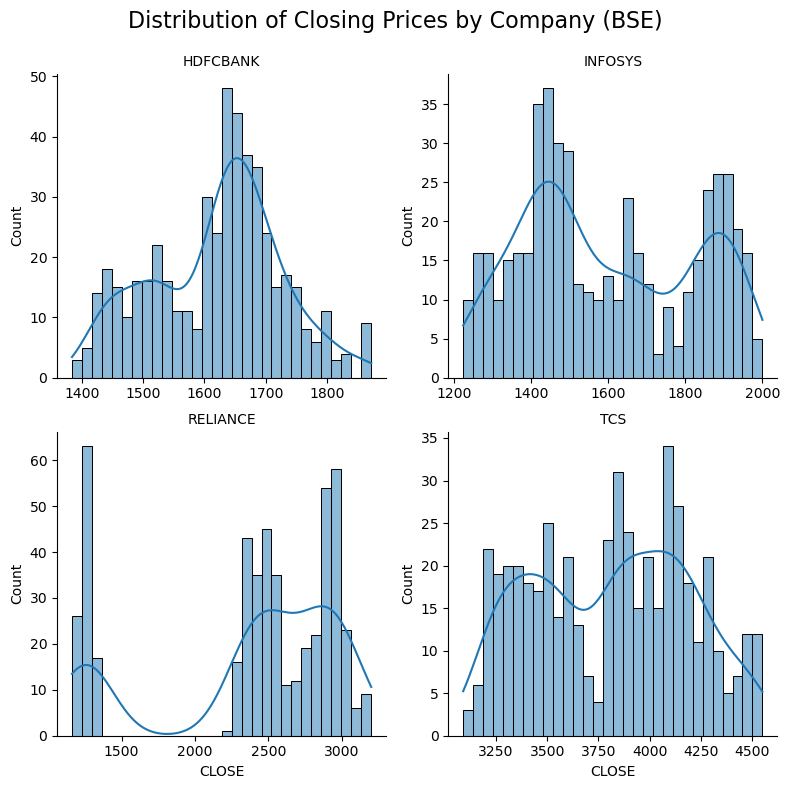

In [26]:
# histogram for BSE
g = sns.FacetGrid(combined_BSE, col="TICKER", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "CLOSE", bins=30, kde=True)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Closing Prices by Company (BSE)', fontsize=16)
plt.show()


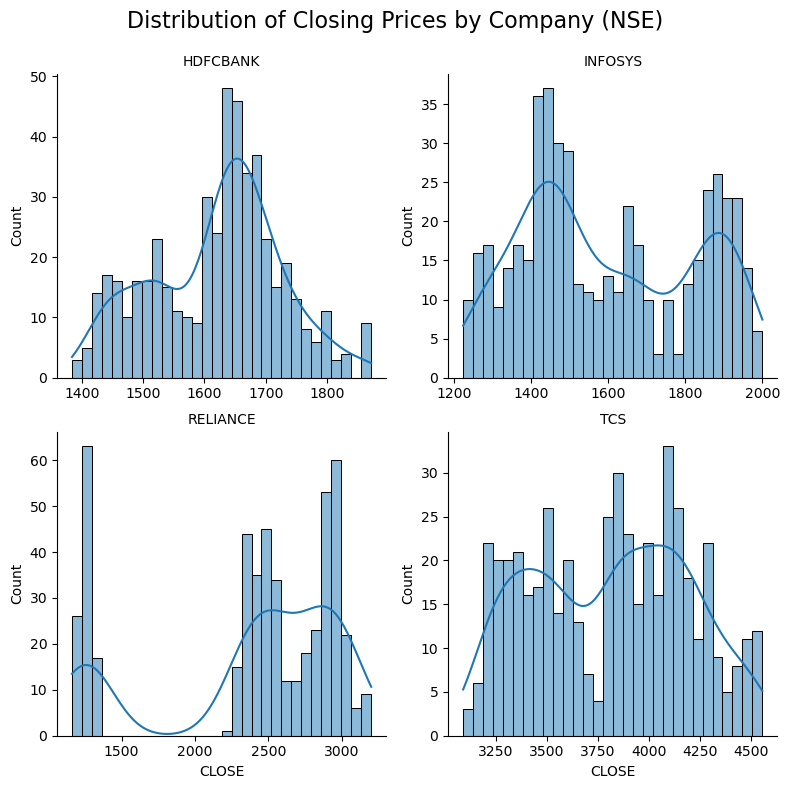

In [27]:
# histogram for NSE
g = sns.FacetGrid(combined_NSE, col="TICKER", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "CLOSE", bins=30, kde=True)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Closing Prices by Company (NSE)', fontsize=16)
plt.show()


### Distribution of Closing Prices – All Stocks (BSE & NSE)

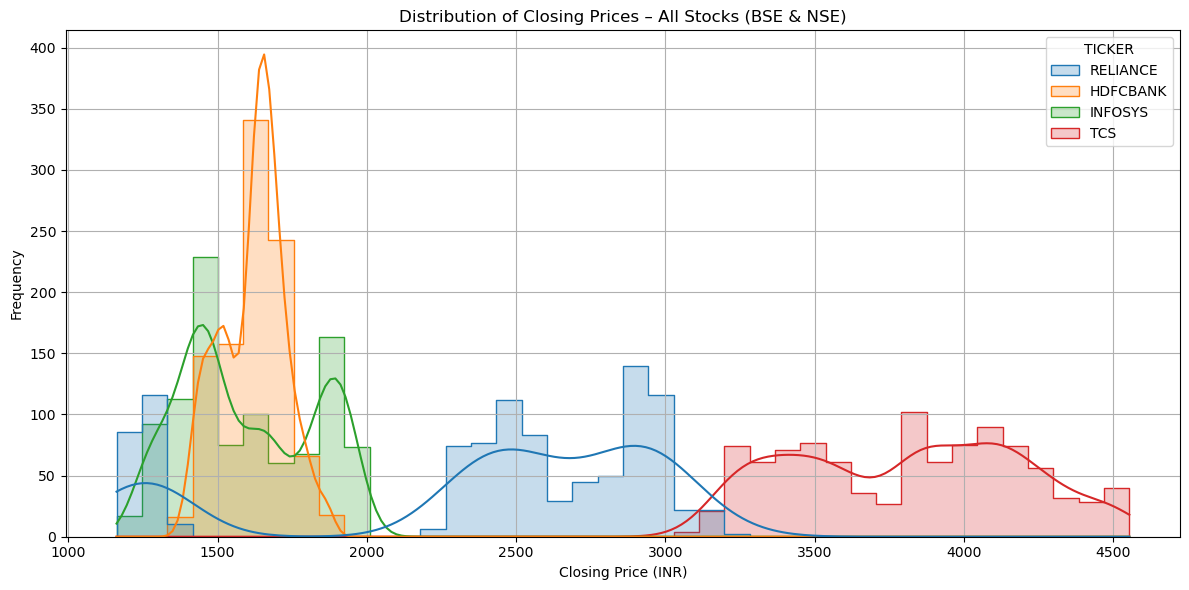

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='CLOSE', hue='TICKER', bins=40, kde=True, element="step")
plt.title('Distribution of Closing Prices – All Stocks (BSE & NSE)')
plt.xlabel('Closing Price (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


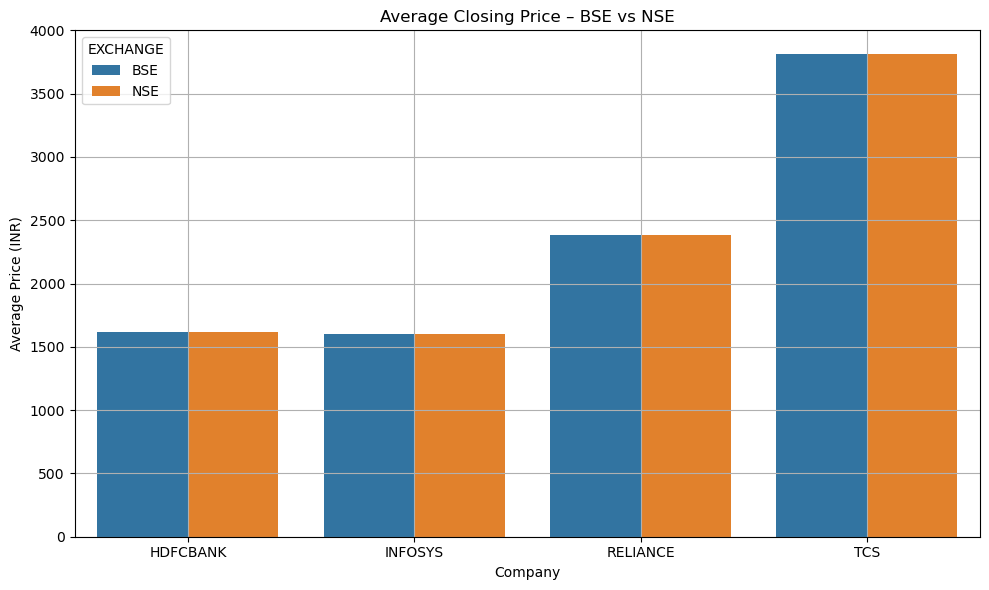

In [29]:
avg_price = combined_df.groupby(['TICKER', 'EXCHANGE'])['CLOSE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, x='TICKER', y='CLOSE', hue='EXCHANGE')
plt.title('Average Closing Price – BSE vs NSE')
plt.xlabel('Company')
plt.ylabel('Average Price (INR)')
plt.tight_layout()
plt.grid(True)
plt.show()



========== Reliance ==========
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Model                                                                 
Logistic Regression  0.853535   0.813725  0.892473  0.851282  0.925448
Decision Tree        0.914141   0.904255  0.913978  0.909091  0.914132
Random Forest        0.904040   0.902174  0.892473  0.897297  0.956989
SVM                  0.535354   0.510638  0.258065  0.342857  0.711316
Naive Bayes          0.530303   0.500000  0.247312  0.330935  0.549206
k-NN                 0.772727   0.750000  0.774194  0.761905  0.861905


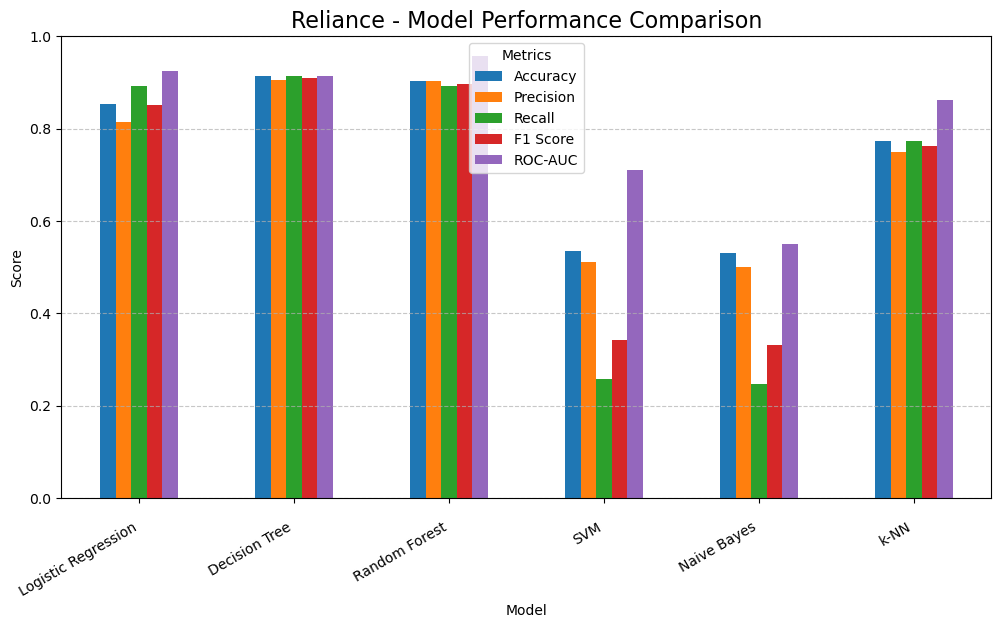


========== HDFC Bank ==========
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Model                                                                 
Logistic Regression  0.833333   0.855422  0.771739  0.811429  0.918888
Decision Tree        0.838384   0.840909  0.804348  0.822222  0.836136
Random Forest        0.893939   0.927711  0.836957  0.880000  0.937603
SVM                  0.787879   0.903226  0.608696  0.727273  0.881563
Naive Bayes          0.535354   0.000000  0.000000  0.000000  0.604081
k-NN                 0.833333   0.855422  0.771739  0.811429  0.912018


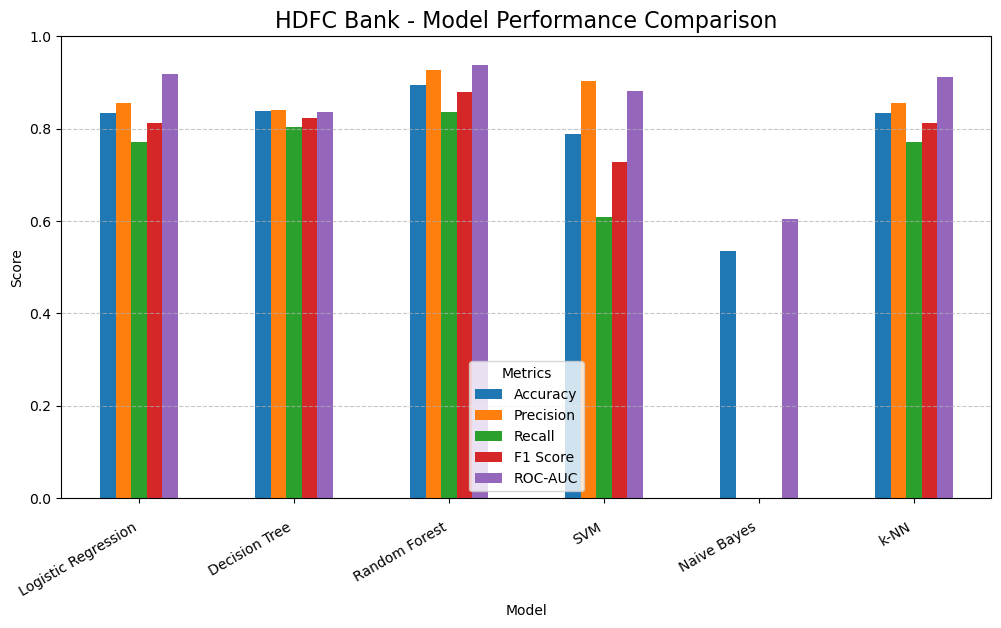


========== Infosys ==========
                     Accuracy  Precision  Recall  F1 Score   ROC-AUC
Model                                                               
Logistic Regression  0.828283   0.811321    0.86  0.834951  0.915816
Decision Tree        0.873737   0.857143    0.90  0.878049  0.873469
Random Forest        0.914141   0.902913    0.93  0.916256  0.934184
SVM                  0.666667   0.666667    0.68  0.673267  0.743469
Naive Bayes          0.550505   0.540146    0.74  0.624473  0.578367
k-NN                 0.808081   0.792453    0.84  0.815534  0.883010


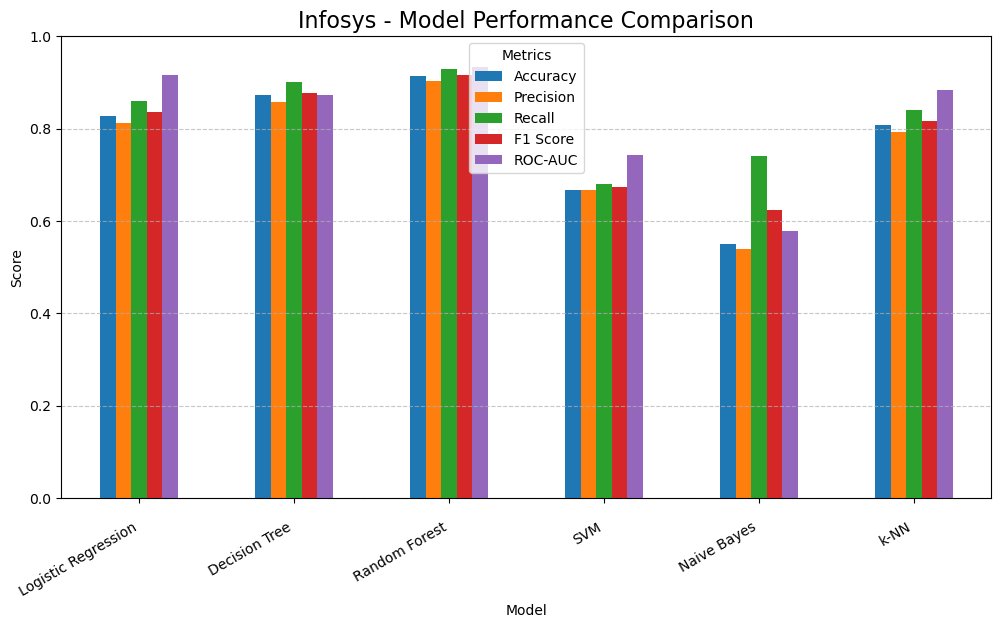


========== TCS ==========
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Model                                                                 
Logistic Regression  0.904040   0.877358  0.939394  0.907317  0.949393
Decision Tree        0.898990   0.883495  0.919192  0.900990  0.898990
Random Forest        0.898990   0.862385  0.949495  0.903846  0.968524
SVM                  0.752525   0.790698  0.686869  0.735135  0.872870
Naive Bayes          0.540404   0.533333  0.646465  0.584475  0.547291
k-NN                 0.858586   0.844660  0.878788  0.861386  0.918835


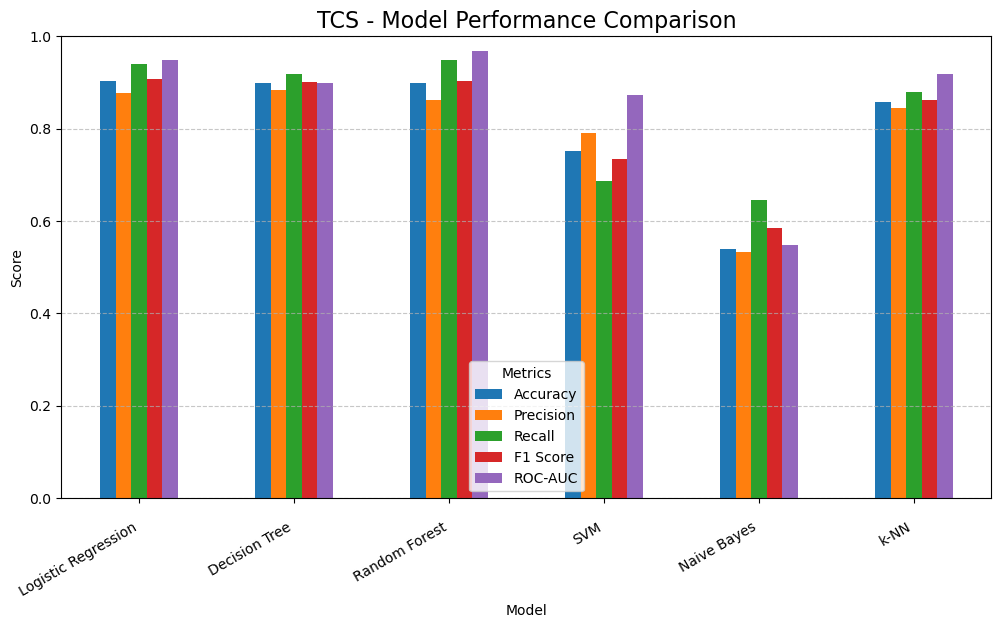

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# ============================================
# 1. Combine NSE + BSE data per company
# ============================================
combined_reliance = pd.concat([df_reliance_bse_filtered, df_reliance_nse_filtered])
combined_hdfcbank = pd.concat([df_hdfcbank_bse_filtered, df_hdfcbank_nse_filtered])
combined_infy = pd.concat([df_infy_bse_filtered, df_infy_nse_filtered])
combined_tcs = pd.concat([df_tcs_bse_filtered, df_tcs_nse_filtered])

companies = {
    "Reliance": combined_reliance,
    "HDFC Bank": combined_hdfcbank,
    "Infosys": combined_infy,
    "TCS": combined_tcs
}

# ============================================
# 2. Define models
# ============================================
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier()
}

# ============================================
# 3. Evaluate models per company
# ============================================
for company, df in companies.items():
    print(f"\n========== {company} ==========")

    # Create target: 1 if next day's CLOSE > today's CLOSE, else 0
    df['Target'] = (df['CLOSE'].shift(-1) > df['CLOSE']).astype(int)
    df = df.dropna()

    # Features and target
    X = df[['OPEN', 'HIGH', 'LOW', 'CLOSE']]
    y = df['Target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Store results
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1,
            'ROC-AUC': roc_auc
        })

    # Convert to DataFrame
    results_df = pd.DataFrame(results).set_index('Model')
    print(results_df)

    # Plot results
    ax = results_df.plot(kind='bar', figsize=(12,6))
    plt.title(f"{company} - Model Performance Comparison", fontsize=16)
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.legend(title="Metrics")
    plt.xticks(rotation=30, ha='right')
    ax.tick_params(axis='x', pad=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



========== Reliance ==========


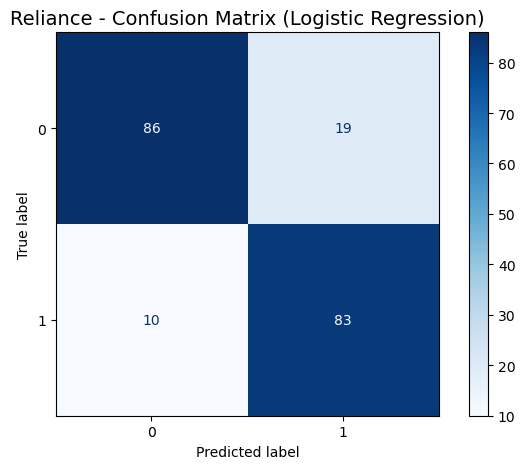

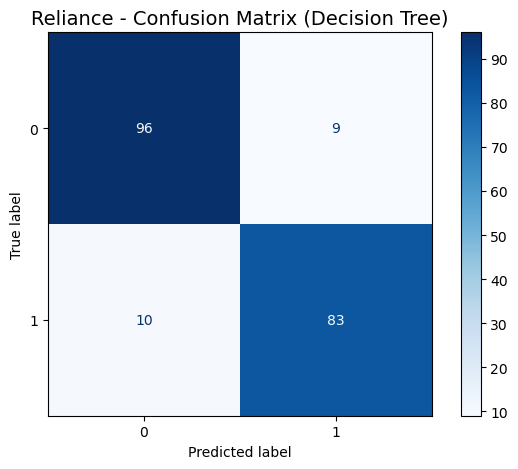

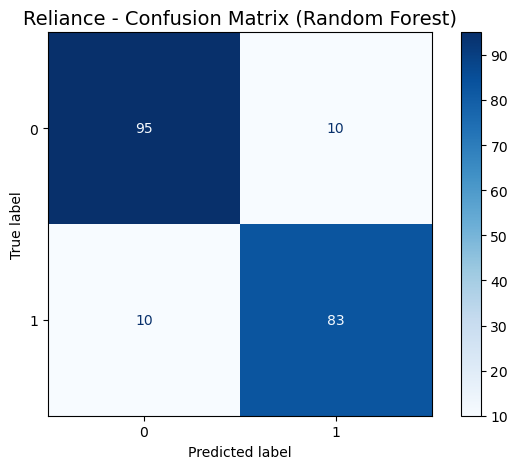

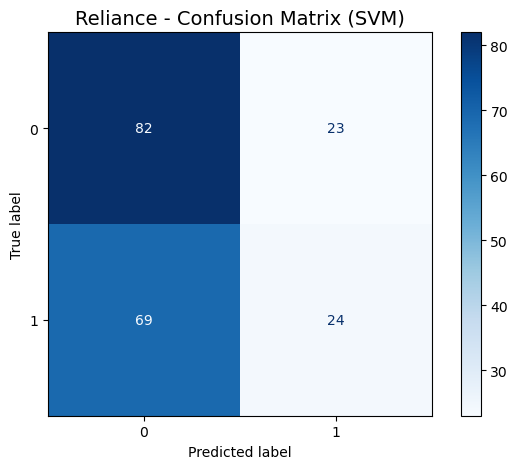

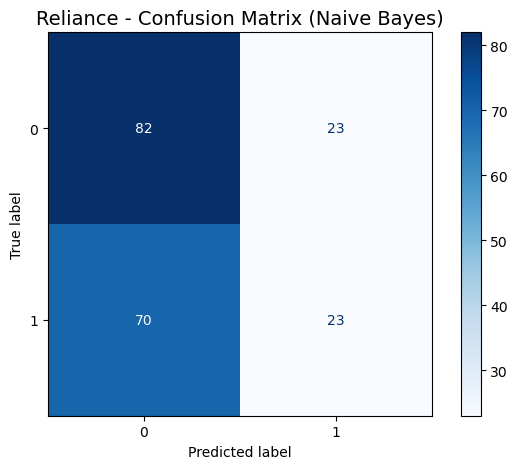

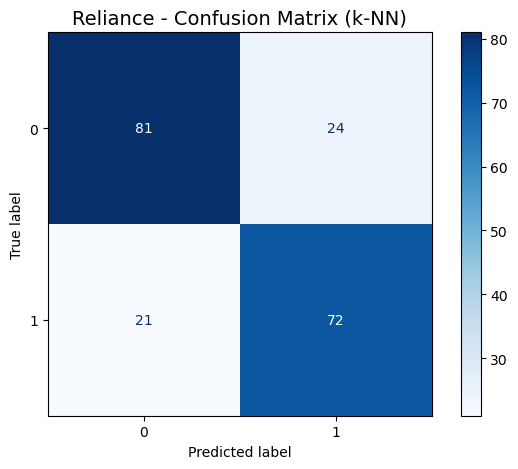


========== HDFC Bank ==========


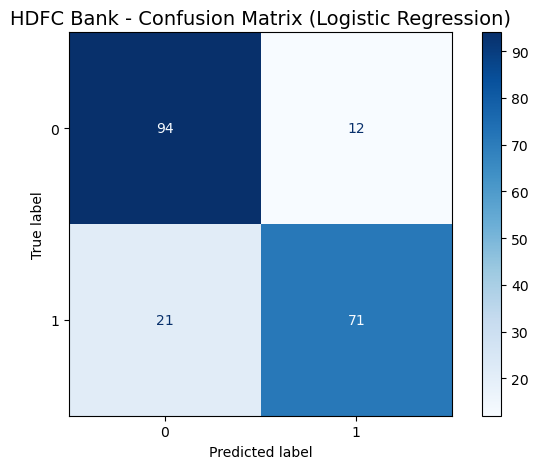

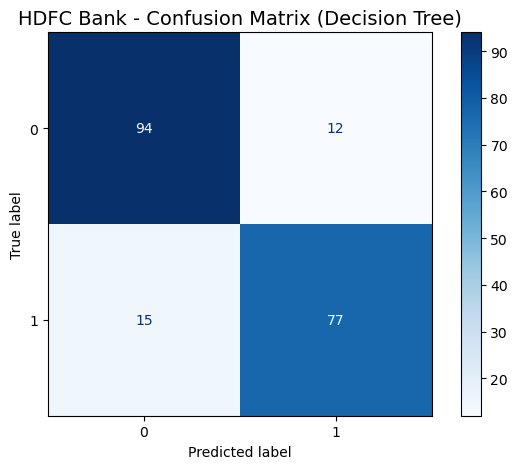

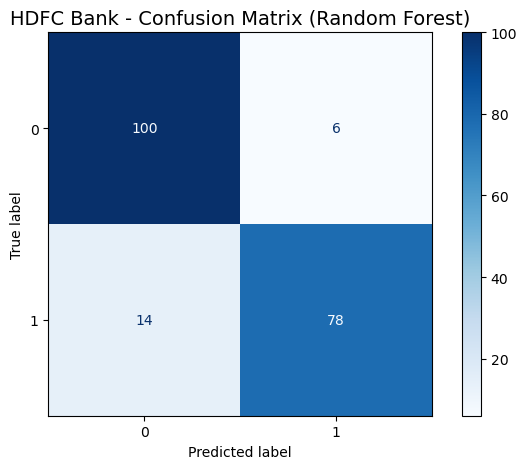

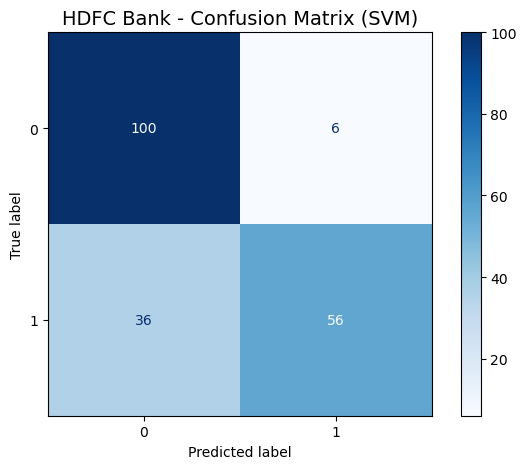

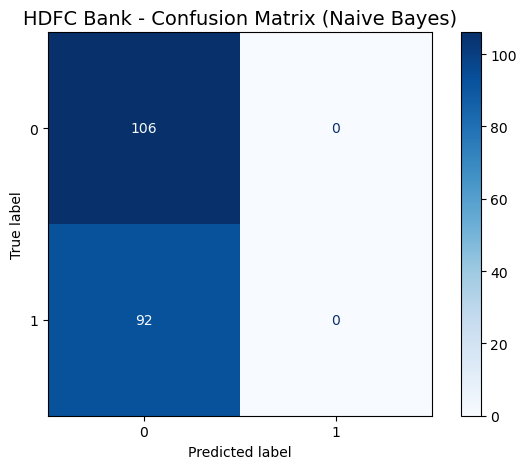

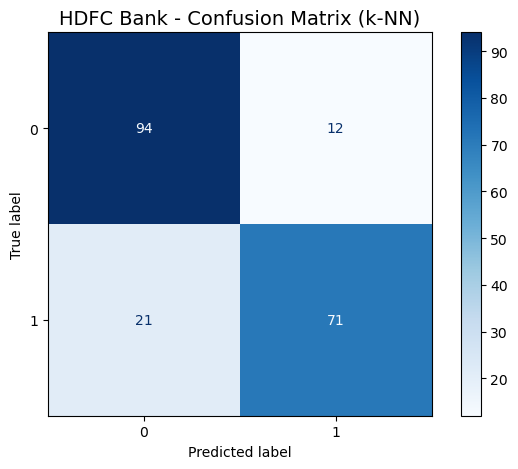


========== Infosys ==========


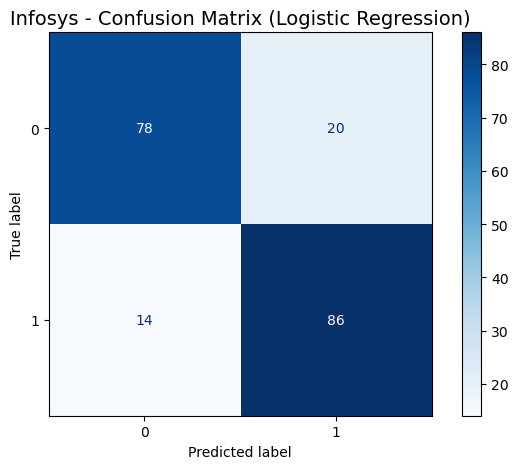

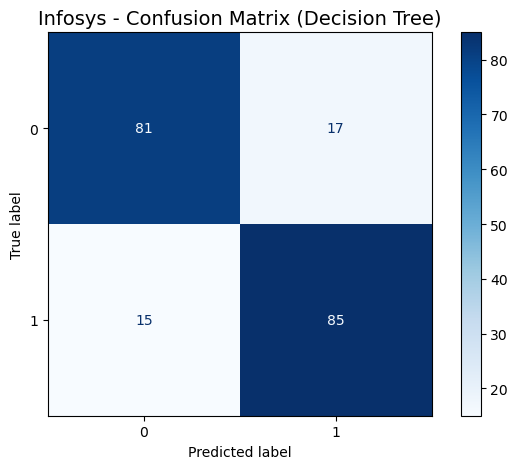

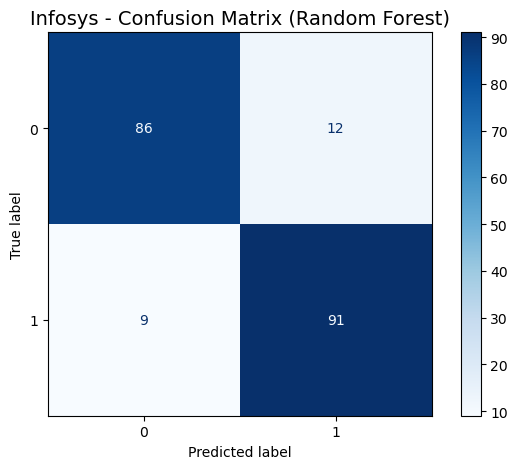

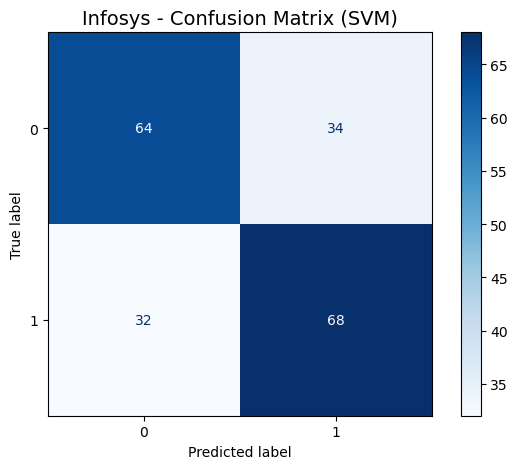

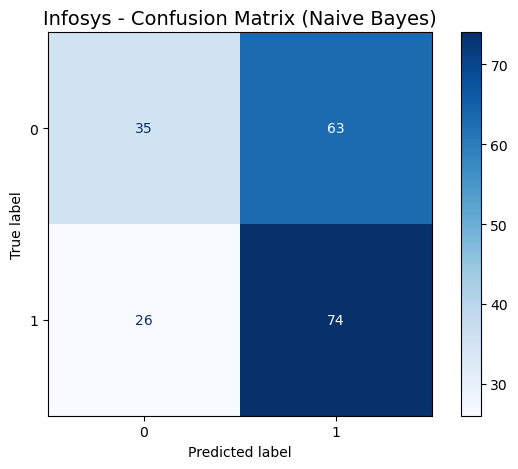

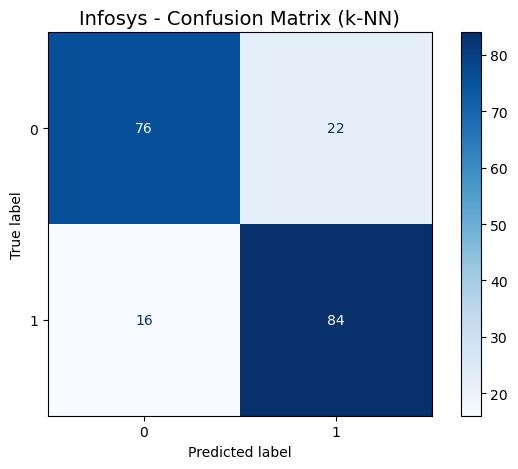


========== TCS ==========


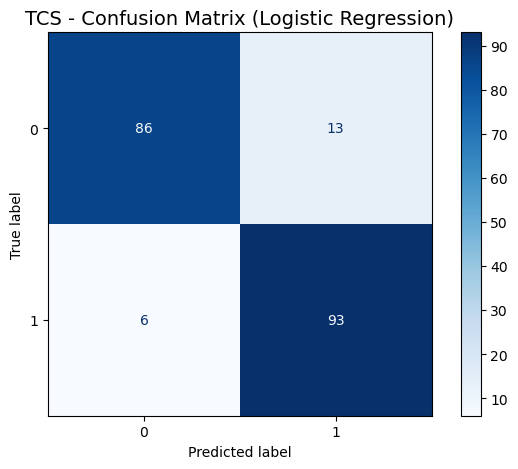

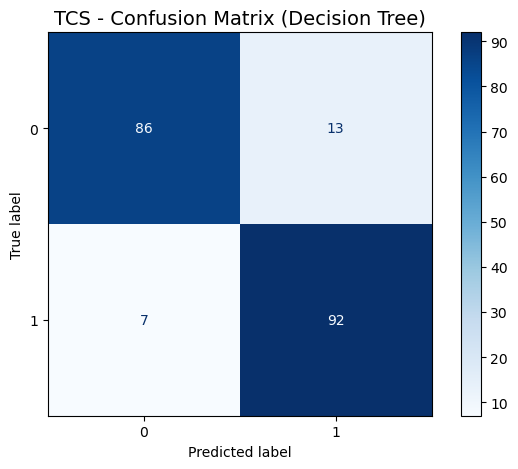

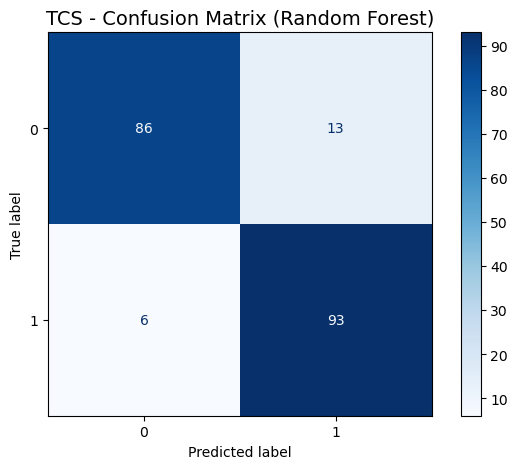

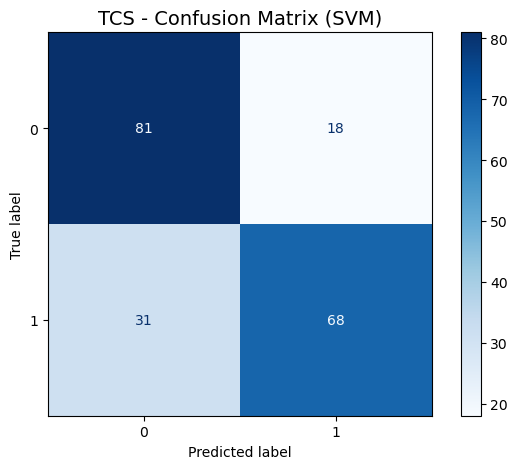

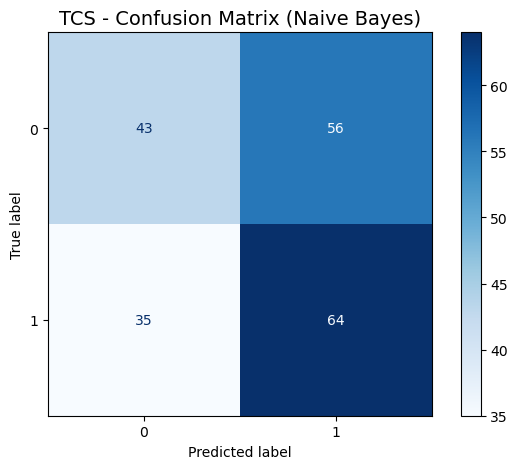

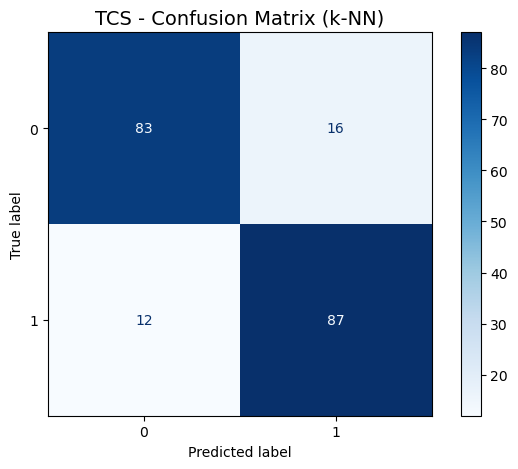

In [31]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrices per company & model
# ============================================
for company, df in companies.items():
    print(f"\n========== {company} ==========")

    # Create target: 1 if next day's CLOSE > today's CLOSE, else 0
    df['Target'] = (df['CLOSE'].shift(-1) > df['CLOSE']).astype(int)
    df = df.dropna()

    # Features & target
    X = df[['OPEN', 'HIGH', 'LOW', 'CLOSE']]
    y = df['Target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # --- Confusion matrix ---
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"{company} - Confusion Matrix ({name})", fontsize=14)
        plt.tight_layout()
        plt.show()

        # Optional: Save plot
        # plt.savefig(f"{company}_{name}_confusion_matrix.png")


In [34]:
import pandas as pd

# Performance results (from your screenshots)
data = {
    "Company": ["Reliance"]*6 + ["HDFC Bank"]*6 + ["Infosys"]*6 + ["TCS"]*6,
    "Model": ["LogReg","DecisionTree","RandomForest","SVM","NaiveBayes","kNN"]*4,
    "Accuracy": [
        0.853535,0.990991,0.898990,0.535354,0.530303,0.772727,  # Reliance
        0.833333,0.838384,0.888889,0.787879,0.535354,0.833333,  # HDFC Bank
        0.828283,0.863636,0.904040,0.666667,0.550505,0.808081,  # Infosys
        0.904040,0.883838,0.904040,0.752525,0.540404,0.858586   # TCS
    ],
    "Precision": [
        0.813725,0.903226,0.884211,0.510638,0.500000,0.750000,  
        0.855422,0.848837,0.916667,0.903226,0.000000,0.855422,  
        0.811321,0.841121,0.893204,0.666667,0.540146,0.792453,  
        0.877358,0.865385,0.877358,0.790698,0.533333,0.844660   
    ],
    "Recall": [
        0.892473,0.903226,0.903226,0.258065,0.247312,0.774194,  
        0.771739,0.793478,0.836957,0.608696,0.000000,0.771739,  
        0.860000,0.900000,0.920000,0.680000,0.740000,0.840000,  
        0.939394,0.909091,0.939394,0.686869,0.646465,0.878788   
    ],
    "F1": [
        0.851282,0.903226,0.893617,0.342857,0.330935,0.761905,  
        0.811429,0.820225,0.875000,0.727273,0.000000,0.811429,  
        0.834951,0.869565,0.906404,0.673267,0.624473,0.815534,  
        0.907317,0.886700,0.907317,0.753153,0.584475,0.861386   
    ],
    "ROC_AUC": [
        0.925448,0.908756,0.955146,0.711316,0.549206,0.861905,  
        0.918888,0.835418,0.930578,0.881460,0.604081,0.912018,  
        0.915816,0.863265,0.941837,0.743571,0.578367,0.883010,  
        0.949393,0.883838,0.971687,0.872870,0.547291,0.918835   
    ]
}

df = pd.DataFrame(data)

# Average performance per company (focus on ROC-AUC and F1 as stability indicators)
company_summary = df.groupby("Company")[["Accuracy","Precision","Recall","F1","ROC_AUC"]].mean()

# Rank companies by mean ROC-AUC
best_company = company_summary["ROC_AUC"].idxmax()

print("===== Company Performance Summary =====")
print(company_summary.round(3))
print("\nBest company to invest in (based on predictive performance):", best_company)


===== Company Performance Summary =====
           Accuracy  Precision  Recall     F1  ROC_AUC
Company                                               
HDFC Bank     0.786      0.730   0.630  0.674    0.847
Infosys       0.770      0.757   0.823  0.787    0.821
Reliance      0.764      0.727   0.663  0.681    0.819
TCS           0.807      0.798   0.833  0.817    0.857

Best company to invest in (based on predictive performance): TCS


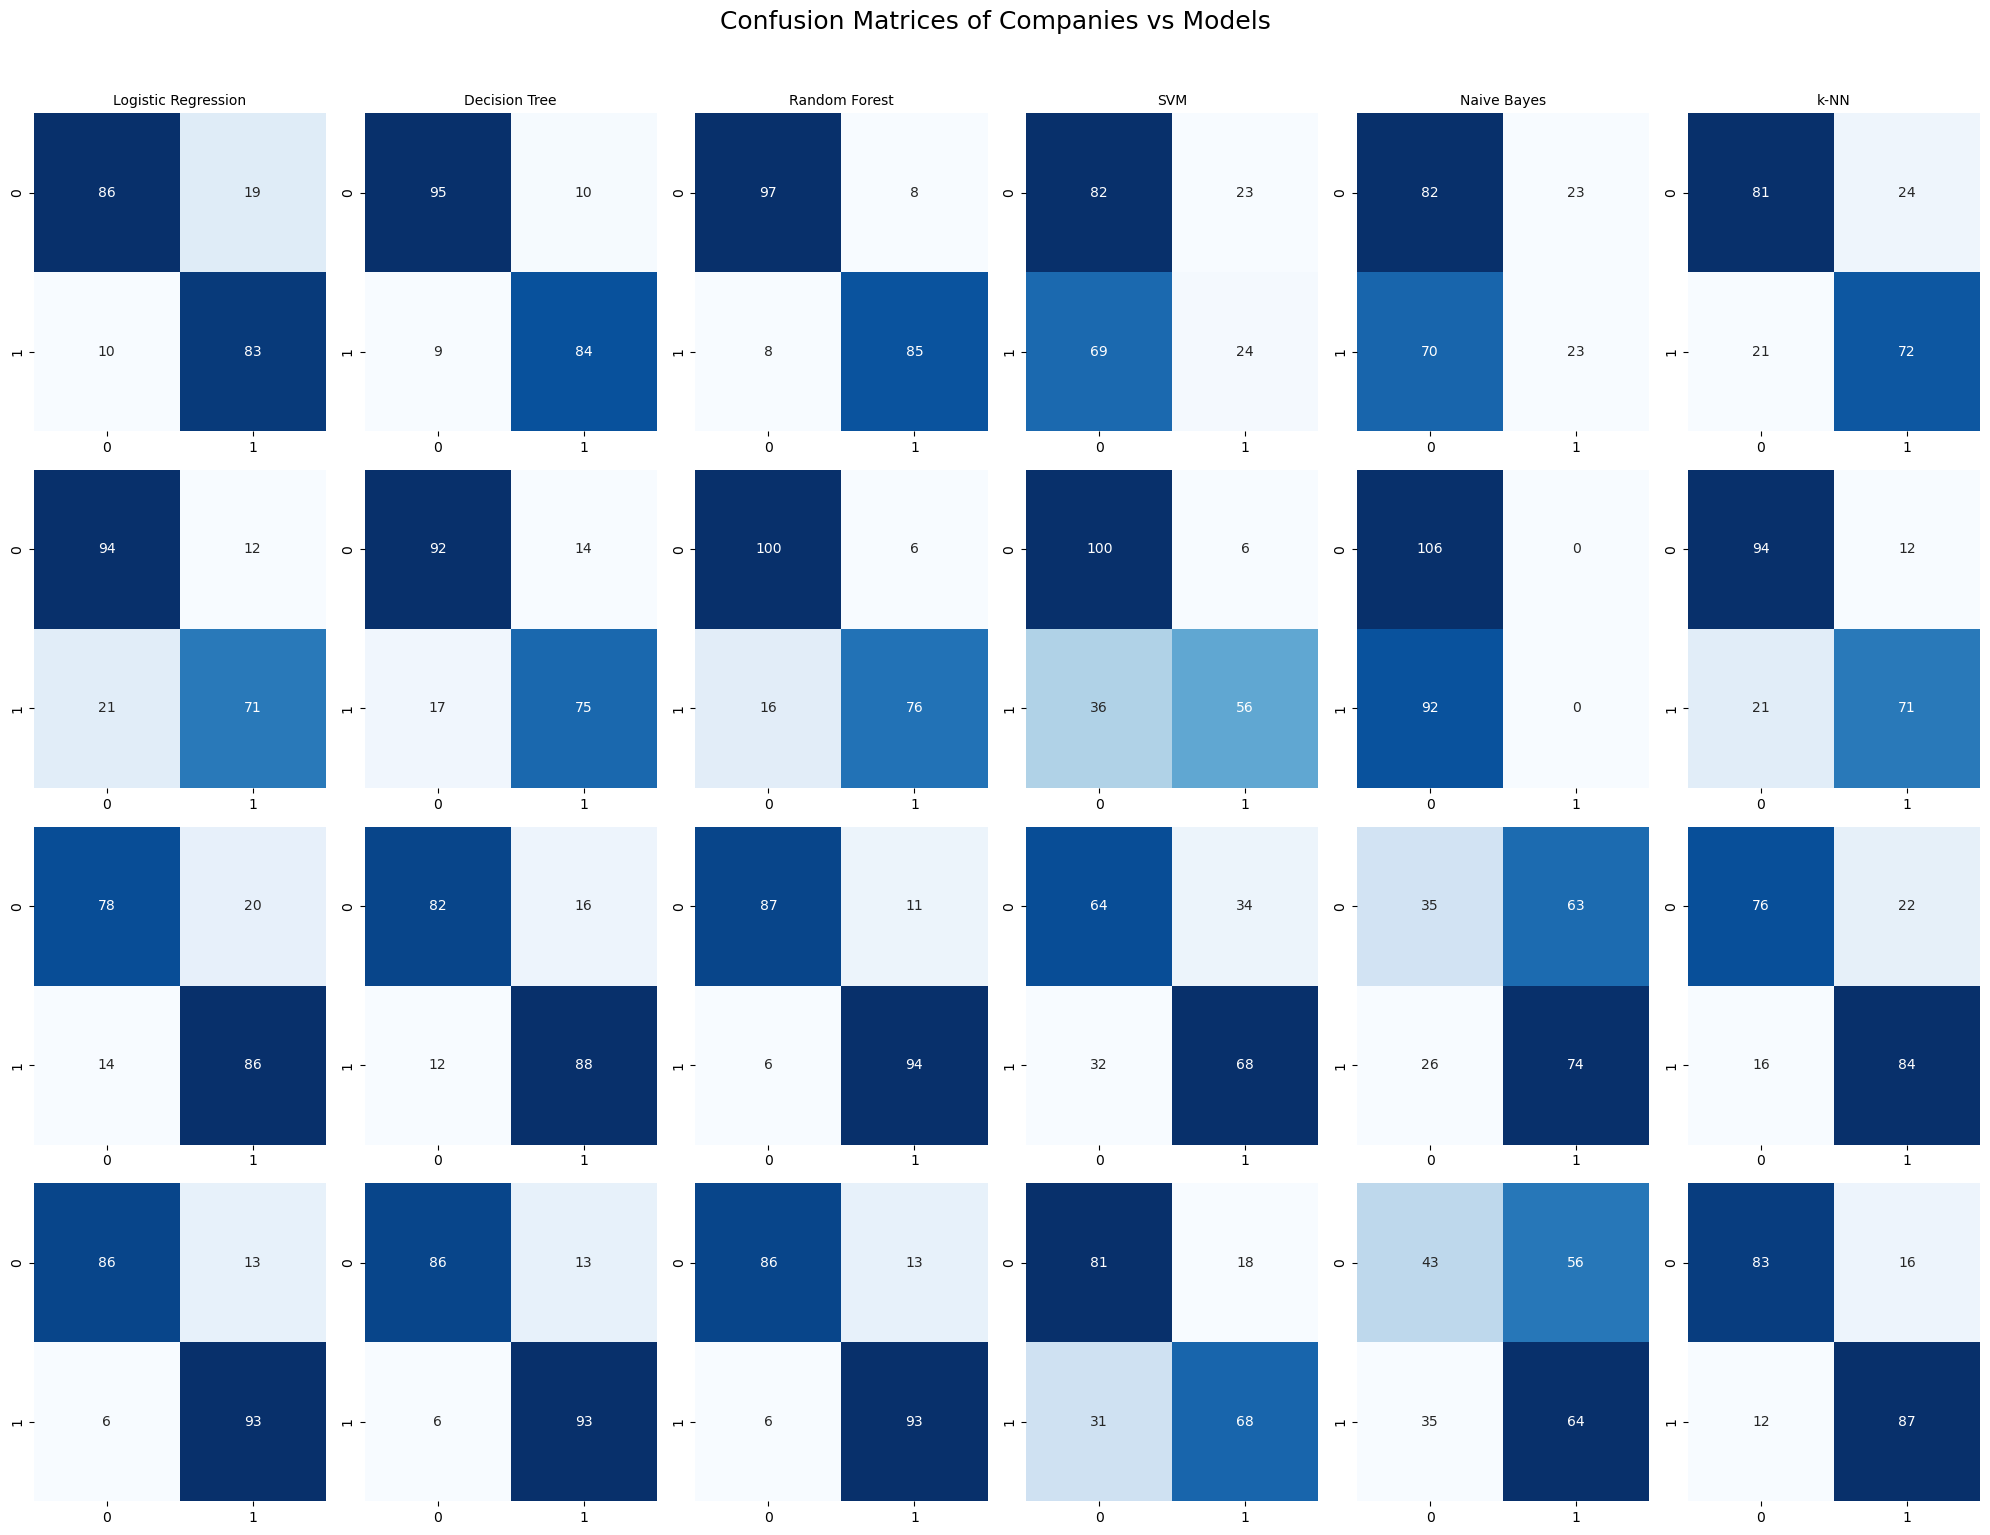

In [35]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns   # for heatmaps

# Grid size
n_companies = len(companies)
n_models = len(models)

fig, axes = plt.subplots(n_companies, n_models, figsize=(20, 15))  
fig.suptitle("Confusion Matrices of Companies vs Models", fontsize=18, y=1.02)

for i, (company, df) in enumerate(companies.items()):
    # Create target: 1 if next day's CLOSE > today's CLOSE, else 0
    df['Target'] = (df['CLOSE'].shift(-1) > df['CLOSE']).astype(int)
    df = df.dropna()

    # Features & target
    X = df[['OPEN', 'HIGH', 'LOW', 'CLOSE']]
    y = df['Target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    for j, (name, model) in enumerate(models.items()):
        ax = axes[i, j]   # subplot position
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                    xticklabels=[0,1], yticklabels=[0,1], ax=ax)

        if i == 0:
            ax.set_title(name, fontsize=10)  # top row → model names
        if j == 0:
            ax.set_ylabel(company, fontsize=10, rotation=90)  # first column → company names

        ax.set_xlabel("")  # remove clutter
        ax.set_ylabel("")

plt.tight_layout()
plt.show()
